In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
data_path = "D:\\OneDrive\\egitim\\verilen\\bogazici-compec-python-ml\\Datasets\\"
data_set = "OnlineRetailDirty.xlsx"

In [58]:
df = pd.read_excel(data_path+data_set)

In [59]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [61]:
df.to_csv(path_or_buf="D:\\OneDrive\\egitim\\verilen\\bogazici-compec-python-ml\\Datasets\\OnlineRetail2.csv", 
          sep=",", index=False, header=True)
#Daha fazla bilgi: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

In [71]:
df = pd.read_csv("D:\\OneDrive\\egitim\\verilen\\bogazici-compec-python-ml\\Datasets\\OnlineRetail2.csv", 
                 parse_dates=['InvoiceDate'], index_col="InvoiceDate")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [73]:
df["TotalPrice"] = df.Quantity * df.UnitPrice

In [74]:
df['months'] = df.index.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,months
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,12
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,12
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,12
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,12
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,12


In [95]:
df_grp_month = df.groupby(["months"]).TotalPrice.agg(['mean']).sort_values("mean")
df_grp_month.head(12)

,mean
months,
1,15.933088
4,16.486399
7,17.240248
11,17.255802
12,17.390010
10,17.627089
2,17.976058
3,18.593313
6,18.742830


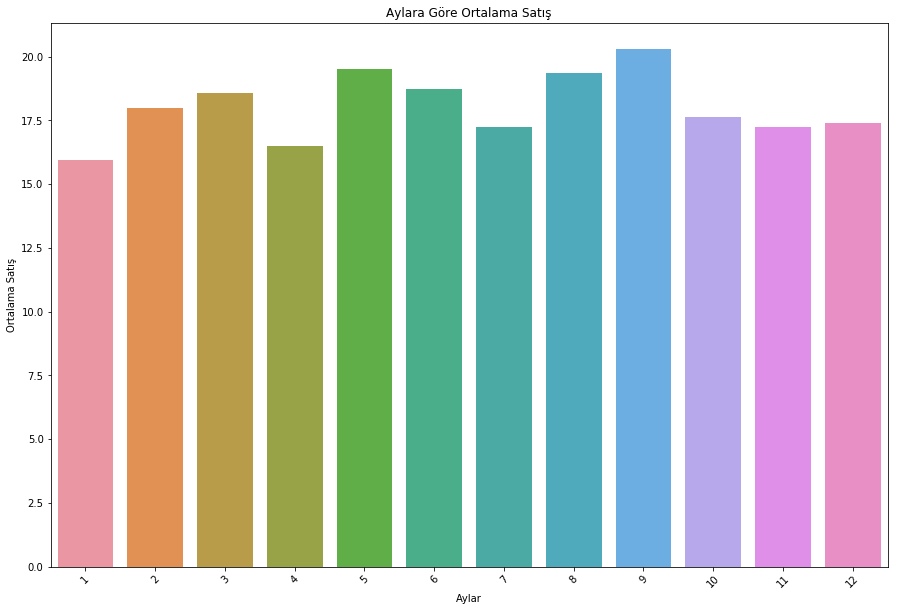

In [96]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_grp_month.index, y=df_grp_month['mean'])
plt.xticks(rotation= 45)
plt.xlabel('Aylar')
plt.ylabel('Ortalama Satış')
plt.title('Aylara Göre Ortalama Satış')
plt.show()

In [107]:
df_grp_month.index.values

array([ 1,  4,  7, 11, 12, 10,  2,  3,  6,  8,  5,  9], dtype=int64)

In [108]:
month_list = []
for i in df_grp_month.index.values:
    if i == 1:
        month_list.append("Jan")
    elif i == 2:
         month_list.append("Feb")
    elif i == 3:
         month_list.append("Mar")
    elif i == 4:
         month_list.append("Apr")
    elif i == 5:
         month_list.append("May")
    elif i == 6:
         month_list.append("Jun")
    elif i == 7:
         month_list.append("Jly")
    elif i == 8:
         month_list.append("Aug")
    elif i == 9:
        month_list.append("Sep")
    elif i == 10:
        month_list.append("Oct")
    elif i == 10:
        month_list.append("Nov")
    else: month_list.append("Dec")
            
print(month_list)       


['Jan', 'Apr', 'Jly', 'Dec', 'Dec', 'Oct', 'Feb', 'Mar', 'Jun', 'Aug', 'May', 'Sep']


In [111]:
df_grp_month["month_names"] = month_list
df_grp_month.head()

,mean,month_names
months,,
1,15.933088,Jan
4,16.486399,Apr
7,17.240248,Jly
11,17.255802,Dec
12,17.390010,Dec


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


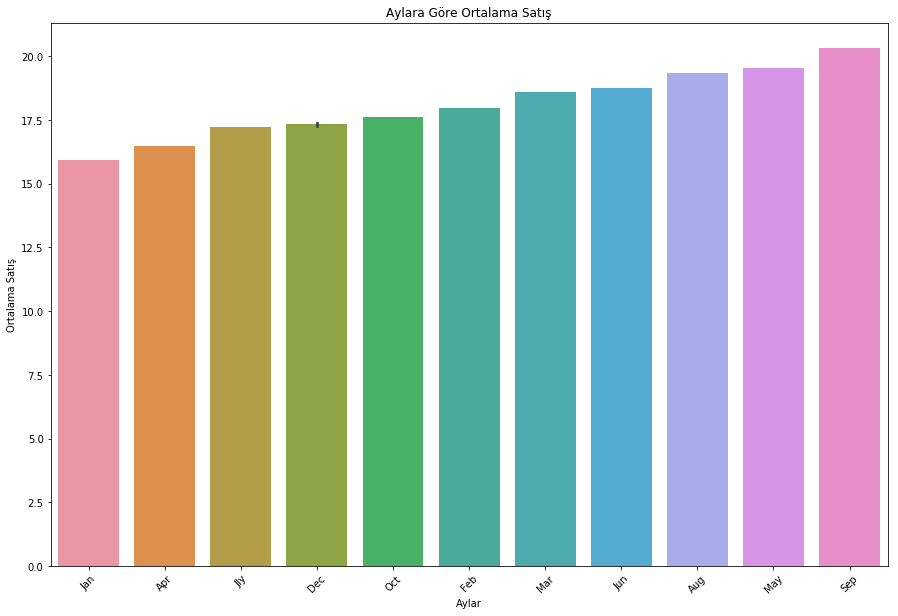

In [112]:

plt.figure(figsize=(15,10))
sns.barplot(x=df_grp_month["month_names"], y=df_grp_month['mean'])
plt.xticks(rotation= 45)
plt.xlabel('Aylar')
plt.ylabel('Ortalama Satış')
plt.title('Aylara Göre Ortalama Satış')
plt.show()

In [97]:
df_grp_country = df.groupby(["Country"]).TotalPrice.agg(['mean']).sort_values("mean")
df_grp_country.head(12)

,mean
Country,
USA,5.948179
Unspecified,10.649753
Saudi Arabia,13.117000
United Kingdom,16.525065
RSA,17.281207
Portugal,19.333127
Malta,19.728110
Belgium,19.773301
Cyprus,20.813971


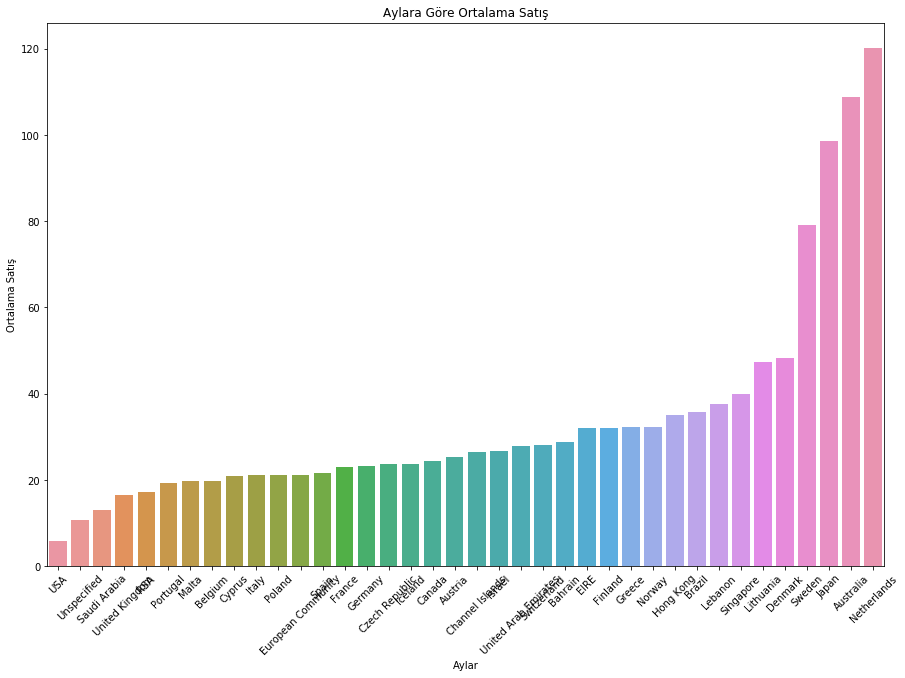

In [98]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_grp_country.index, y=df_grp_country['mean'])
plt.xticks(rotation= 45)
plt.xlabel('Aylar')
plt.ylabel('Ortalama Satış')
plt.title('Aylara Göre Ortalama Satış')
plt.show()